### Hypothesis 3: Companies in the AI industry prefer candidates with experience in ML and TensorFlow.

In [1]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Required Libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
# database connection details
db_type = 'postgresql'  
username = 'postgres'
password = 'abc123'
host = 'localhost'
port = '5432'  
database = 'DataEngineering'

# Create the connection string
connection_string = f'{db_type}://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)


In [25]:
# Define the SQL query
from sqlalchemy import create_engine, text
query = """
SELECT 
    c."Company",
    c."Industry",
    jp."Job_Posting_id",
    s."Skill"
FROM 
    public."Companies" c
JOIN 
    public."Job_Postings" jp 
    ON c."Company_id" = jp."Company_id"
JOIN 
    public."Job_Postings_Skills" jps 
    ON jp."Job_Posting_id" = jps."Job_Posting_id"
JOIN 
    public."Skills" s 
    ON jps."Skill_id" = s."Skill_id"
WHERE
   UPPER(s."Skill") IN ('ML', 'AI', 'TENSORFLOW')
    AND TRIM(c."Industry") = 'IT Services and IT Consulting';
"""

try:
    with engine.connect() as connection:
        result = connection.execute(text(query))
        data = result.fetchall()
        columns = result.keys()

    # Load the data into a Pandas DataFrame
    df = pd.DataFrame(data, columns=columns)
    print(df)

except Exception as e:
    print(f"Error executing query: {e}")

                      Company                        Industry  Job_Posting_id  \
0    IDESLABS PRIVATE LIMITED   IT Services and IT Consulting             477   
1                       Wipro   IT Services and IT Consulting               1   
2                       Wipro   IT Services and IT Consulting               2   
3                       Wipro   IT Services and IT Consulting               3   
4                       Wipro   IT Services and IT Consulting               4   
..                        ...                             ...             ...   
766                    Uplers   IT Services and IT Consulting             767   
767                    Uplers   IT Services and IT Consulting             768   
768                    Uplers   IT Services and IT Consulting             777   
769                    Uplers   IT Services and IT Consulting             780   
770                    Uplers   IT Services and IT Consulting             787   

          Skill  
0    tens

In [26]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

                    Company                        Industry  Job_Posting_id  \
0  IDESLABS PRIVATE LIMITED   IT Services and IT Consulting             477   
1                     Wipro   IT Services and IT Consulting               1   
2                     Wipro   IT Services and IT Consulting               2   
3                     Wipro   IT Services and IT Consulting               3   
4                     Wipro   IT Services and IT Consulting               4   

        Skill  
0  tensorflow  
1          ai  
2          ai  
3          ai  
4          ai  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         771 non-null    object
 1   Industry        771 non-null    object
 2   Job_Posting_id  771 non-null    int64 
 3   Skill           771 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.2+ KB
None
     

### Data Visualization

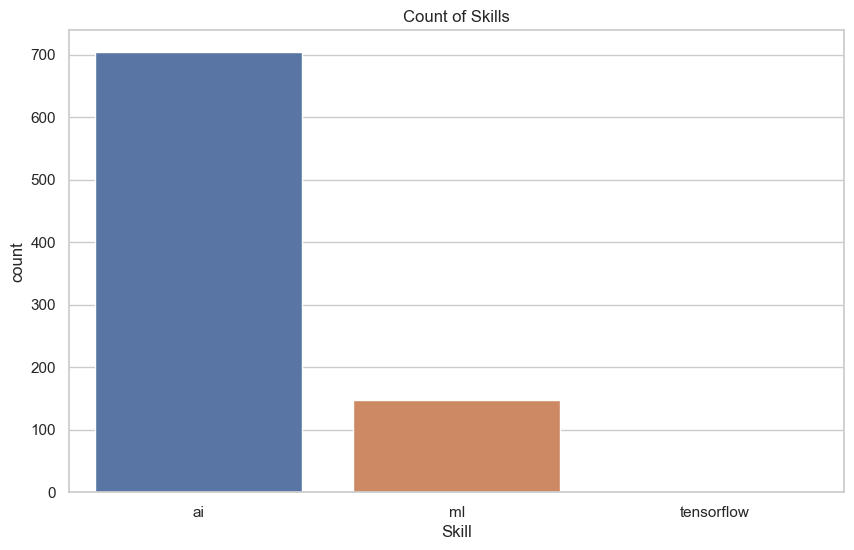

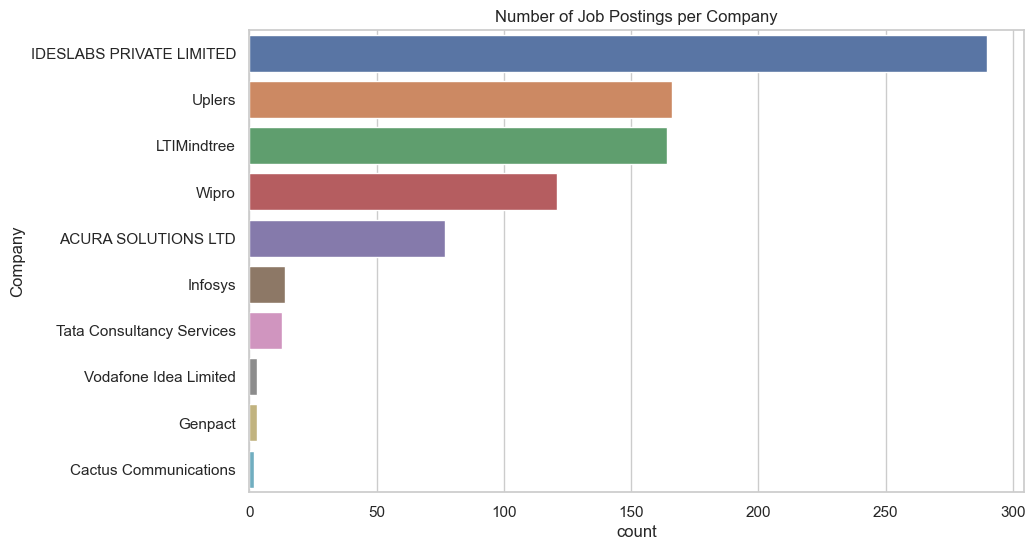

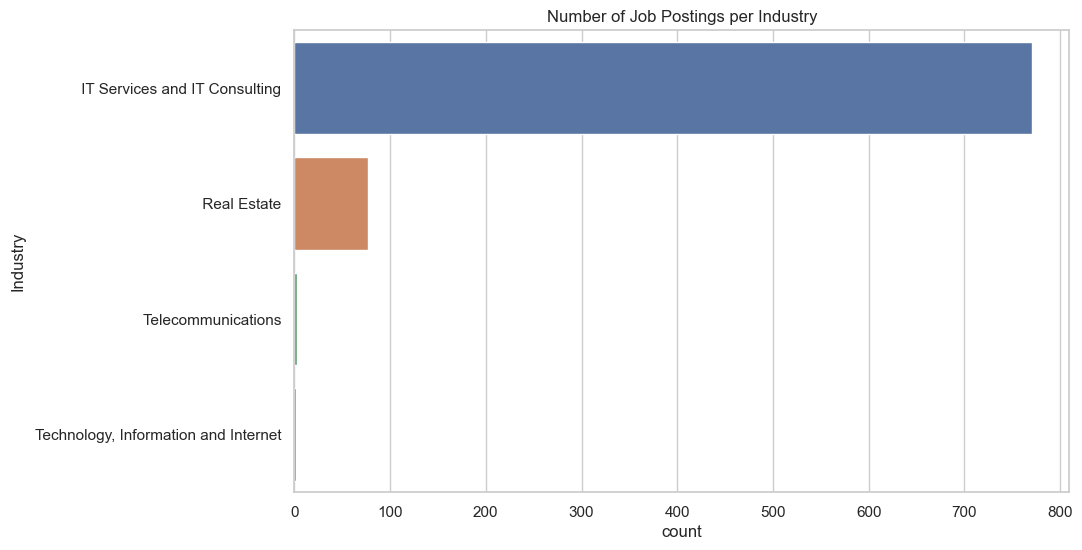

In [26]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Count plot for Skills
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Skill', order=df['Skill'].value_counts().index)
plt.title('Count of Skills')
plt.show()

# Count plot for Companies
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Company', order=df['Company'].value_counts().index)
plt.title('Number of Job Postings per Company')
plt.show()

# Count plot for Industries
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index)
plt.title('Number of Job Postings per Industry')
plt.show()

In [27]:
# Group by Company and Skill to count job postings
skill_counts = df.groupby(['Company', 'Skill']).size().unstack(fill_value=0)
print(skill_counts)

Skill                       ai  ml  tensorflow
Company                                       
Genpact                      3   0           0
IDESLABS PRIVATE LIMITED   253  36           1
Infosys                     14   0           0
LTIMindtree                132  32           0
Tata Consultancy Services   11   2           0
Uplers                     120  46           0
Wipro                       98  23           0


In [37]:
summary = skill_counts.sum().to_frame('Count')
summary['Ratio'] = summary['Count'] / summary['Count'].sum()

# Display the DataFrame (if needed in a local environment)
print(summary)

            Count     Ratio
Skill                      
ai            631  0.818418
ml            139  0.180285
tensorflow      1  0.001297


### Visualization

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32704\2567787703.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, count + 5, f'{summary["Ratio"][i]:.2%}', ha='center')


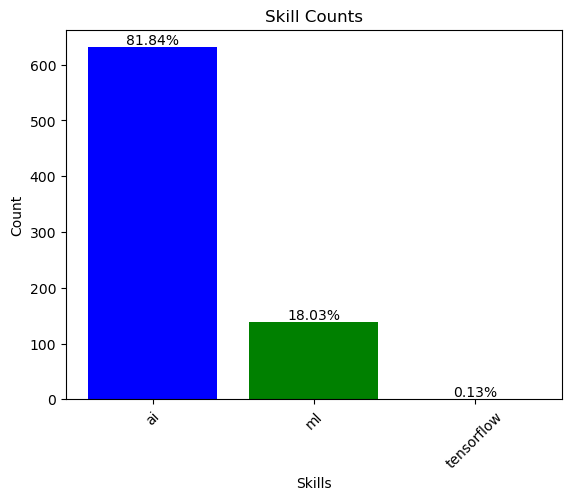

In [38]:
# Plotting the summary
fig, ax = plt.subplots()

# Bar chart 
ax.bar(summary.index, summary['Count'], color=['blue', 'green', 'red'])

ax.set_xlabel('Skills')
ax.set_ylabel('Count')
ax.set_title('Skill Counts')
plt.xticks(rotation=45)

for i, count in enumerate(summary['Count']):
    ax.text(i, count + 5, f'{summary["Ratio"][i]:.2%}', ha='center')

# Display the plot
plt.show()

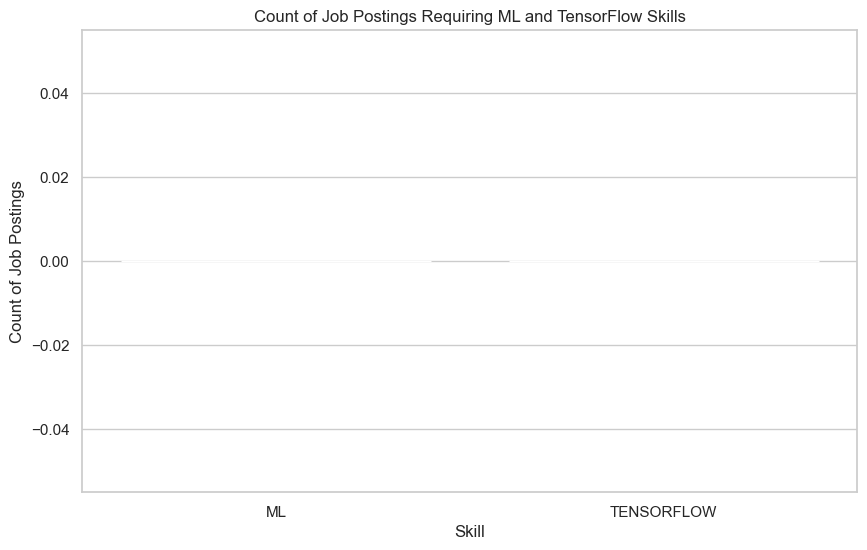

<Figure size 1400x800 with 0 Axes>

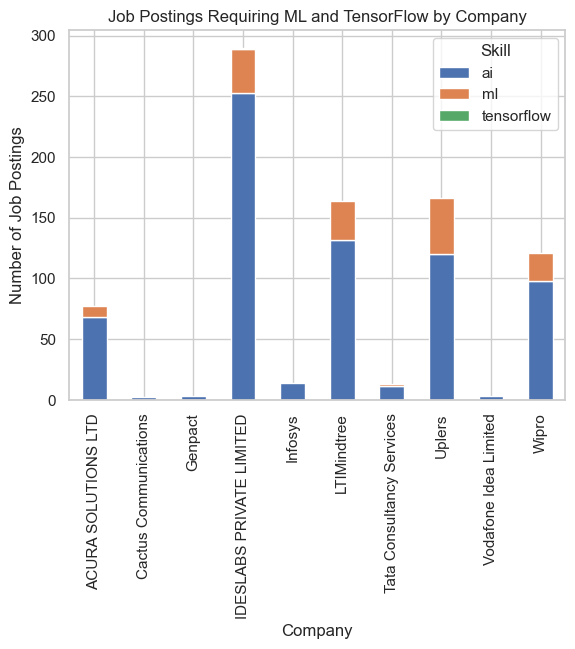

In [36]:
sns.set(style="whitegrid")

# Plot the count of job postings requiring ML and TensorFlow skills
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ai, x='Skill', order=['ML', 'TENSORFLOW'])
plt.title('Count of Job Postings Requiring ML and TensorFlow Skills')
plt.xlabel('Skill')
plt.ylabel('Count of Job Postings')
plt.show()

# Plot the distribution of job postings by company
plt.figure(figsize=(14, 8))
skill_counts.plot(kind='bar', stacked=True)
plt.title('Job Postings Requiring ML and TensorFlow by Company')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.legend(title='Skill')
plt.show()

### Apply Machine Learning Models

In [40]:
summary

,Count,Ratio
Skill,,
ai,631,0.818418
ml,139,0.180285
tensorflow,1,0.001297


In [52]:
# Split the data

X = summary[['Count']]
y = summary['Ratio']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### k-Nearest Neighbors (k-NN)


In [59]:
n_neighbors = min(2, len(X_train))

# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Mean Squared Error: {mse_knn}")
print(f'k-NN SQL Demand R^2 Score: {r2_knn:.2f}')

KNN Mean Squared Error: 0.5294402640463898
k-NN SQL Demand R^2 Score: nan


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Random Forest

In [60]:
# Random Forest for Python Demand
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.45901943102847914


### XGBoost

In [61]:
# XGBoost for Python Demand
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Mean Squared Error: {mse_xgb}")

XGBoost Mean Squared Error: 0.4084200324688374


### Interpretation
#### Mean Squared Error (MSE): Lower values indicate better performance.
#### R-squared (R²): Values closer to 1 indicate a better fit.

### According to above results, Hypothesis 3 is wrong!